In [ ]:
# 1- Introduction des données fournies
""" -> Structure : Ce tableau représente le taux d'achèvement au niveau secondaire en pourcent par région selon le sexe et le niveau de vie.
      Les données sont structurés en fonction de :
        -- Région
        -- Sexe
        -- Quintille de bien-être économique
        -- Milieu de vie (Urbain, rural)

    -> Variables :
        -- Quantitatives : taux d'achèvement en %
        -- Qualitatives : régions, milieu de vie, quintile de bien-être économique.

    -> Intérêt : Comprendre les disparités régionales et socio-économiques dans l’accès à l’éducation secondaire, en vue de formuler des politiques éducatives.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Aperçu des données :
            Région  Urbain Masculin  Urbain Féminin  Urbain Total  \
0       Analamanga             56.9            57.5          57.2   
1   Vakinankaratra             43.2            46.0          44.6   
2            Itasy             50.6            51.3          50.9   
3        Bongolava             46.8            43.4          45.1   
4  Haute Matsiatra             49.6            52.9          51.4   

   Rural Masculin  Rural Féminin  Rural Total  Total Masculin  Total Féminin  \
0            41.1           44.9         43.1            47.7           50.5   
1            16.1           16.8         16.4            22.6           24.1   
2            17.9           19.9         18.9            21.4           23.5   
3            16.6           16.4         16.5            20.4           19.9   
4            13.6           17.5   

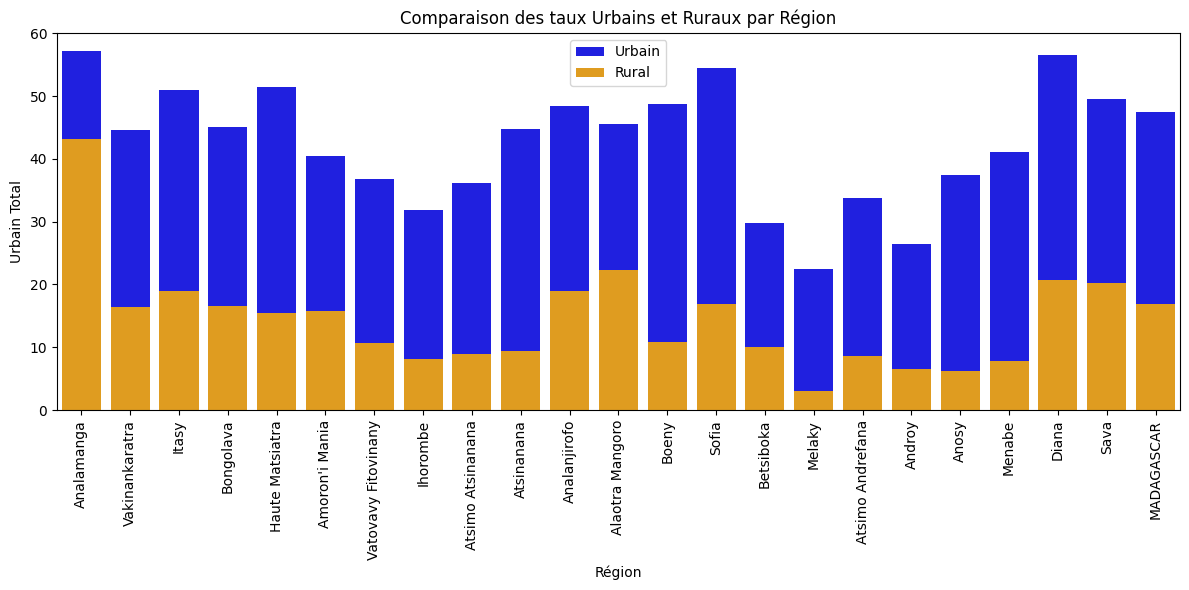

<ipython-input-21-d4b32b523852>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x='Quintile', y='Valeur', palette='viridis')


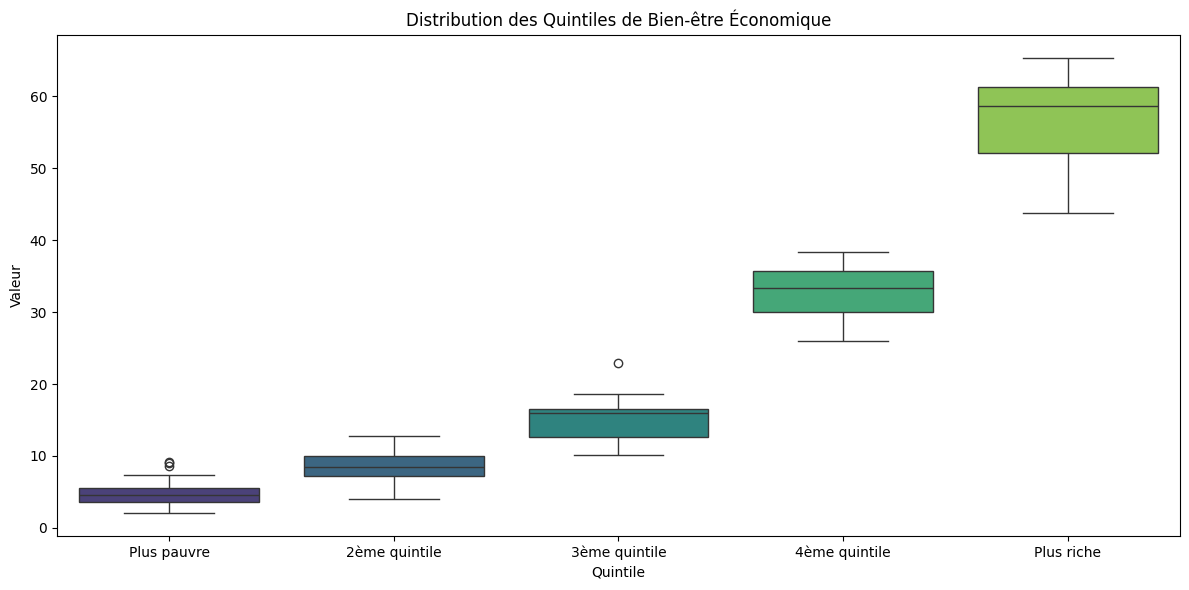

<ipython-input-21-d4b32b523852>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Région', y='Plus riche', palette='coolwarm')


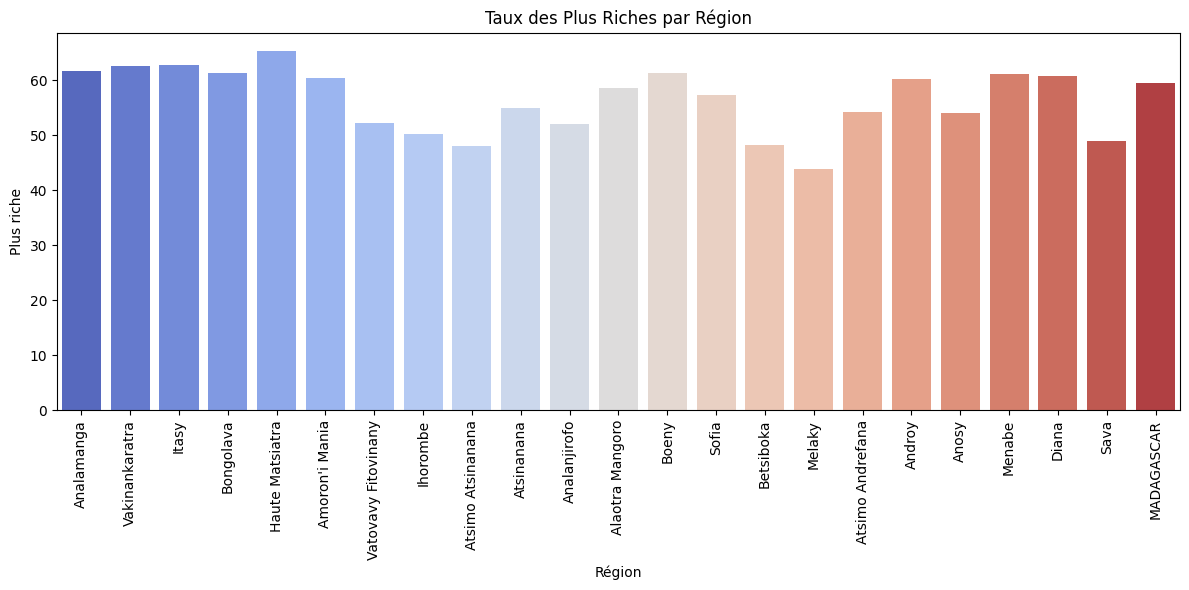

In [21]:
# 2- Visualisations pertinentes des données

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from google.colab import drive


# uploaded = files.upload()
# data = pd.read_csv("madagascar_data.csv")
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/madagascar_data.csv')


print("Aperçu des données :")
print(df.head())  # Montre les 5 premières lignes du fichier

print("\nColonnes disponibles :")
print(df.columns)

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Région', y='Urbain Total', color='blue', label='Urbain')
sns.barplot(data=df, x='Région', y='Rural Total', color='orange', label='Rural')
plt.xticks(rotation=90)
plt.title('Comparaison des taux Urbains et Ruraux par Région')
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
quintiles = ['Plus pauvre', '2ème quintile', '3ème quintile', '4ème quintile', 'Plus riche']
df_melted = df.melt(id_vars=['Région'], value_vars=quintiles, var_name='Quintile', value_name='Valeur')
sns.boxplot(data=df_melted, x='Quintile', y='Valeur', palette='viridis')
plt.title('Distribution des Quintiles de Bien-être Économique')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Région', y='Plus riche', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Taux des Plus Riches par Région')
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Aperçu des données :
            Région  Urbain Masculin  Urbain Féminin  Urbain Total  \
0       Analamanga             56.9            57.5          57.2   
1   Vakinankaratra             43.2            46.0          44.6   
2            Itasy             50.6            51.3          50.9   
3        Bongolava             46.8            43.4          45.1   
4  Haute Matsiatra             49.6            52.9          51.4   

   Rural Masculin  Rural Féminin  Rural Total  Total Masculin  Total Féminin  \
0            41.1           44.9         43.1            47.7           50.5   
1            16.1           16.8         16.4            22.6           24.1   
2            17.9           19.9         18.9            21.4           23.5   
3            16.6           16.4         16.5            20.4           19.9   
4            13.6           17.5   

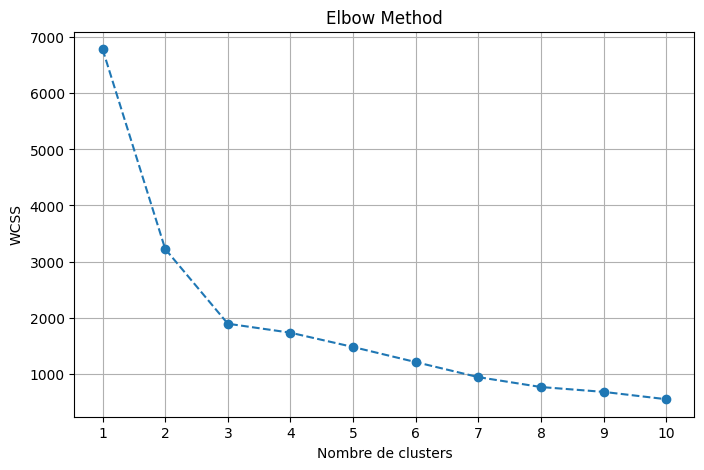

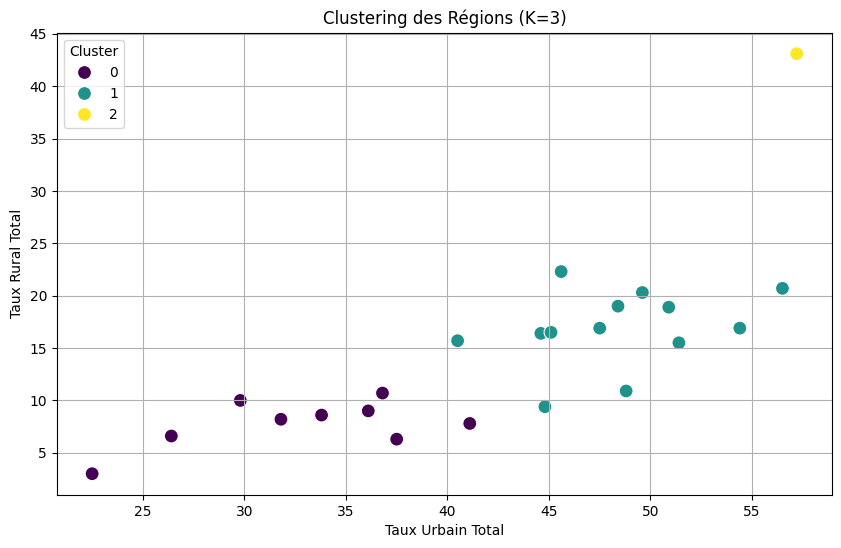


Répartition des régions par cluster :
                 Région  Cluster
19               Menabe        0
18                Anosy        0
17               Androy        0
16     Atsimo Andrefana        0
6   Vatovavy Fitovinany        0
7              Ihorombe        0
8     Atsimo Atsinanana        0
15               Melaky        0
14            Betsiboka        0
11      Alaotra Mangoro        1
20                Diana        1
13                Sofia        1
22           MADAGASCAR        1
21                 Sava        1
10         Analanjirofo        1
9            Atsinanana        1
5        Amoron'i Mania        1
4       Haute Matsiatra        1
3             Bongolava        1
2                 Itasy        1
1        Vakinankaratra        1
12                Boeny        1
0            Analamanga        2


In [23]:
# 3- Clustering des régions selon ces données
from google.colab import files
from google.colab import drive
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/madagascar_data.csv')

print("Aperçu des données :")
print(df.head())  # Montre les 5 premières lignes du fichier

columns_for_clustering = [
    'Urbain Total', 'Rural Total', 'Total',
    'Plus pauvre', '2ème quintile', '3ème quintile', '4ème quintile', 'Plus riche'
]
data_for_clustering = df[columns_for_clustering]

# Étape 3 : Méthode du coude (Elbow Method) pour déterminer le nombre optimal de clusters
wcss = []  # Within-Cluster Sum of Squares

# Tester plusieurs nombres de clusters (k)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    wcss.append(kmeans.inertia_)

# Tracer la courbe WCSS
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Étape 4 : Appliquer K-moyennes avec le nombre optimal de clusters (choisi selon le graphe)
optimal_k = 3  # Remplacez par le nombre optimal trouvé à partir du graphe
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_for_clustering)

# Étape 5 : Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='Urbain Total', y='Rural Total', hue='Cluster', palette='viridis', s=100
)
plt.title(f'Clustering des Régions (K={optimal_k})')
plt.xlabel('Taux Urbain Total')
plt.ylabel('Taux Rural Total')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Étape 6 : Analyse des clusters
print("\nRépartition des régions par cluster :")
print(df[['Région', 'Cluster']].sort_values(by='Cluster'))

In [ ]:
# 4- Interprétations du résultat
''' Ce que représente les cluster :
      --Cluster 0 : Régions principalement rurales avec un pourcentage élevé de "Plus pauvre" et un faible taux d'urbanisation.
      --Cluster 1 : Régions avec un équilibre entre zones urbaines et rurales,
      avec une majorité dans les quintiles intermédiaires de bien-être économique.
      --Cluster 2 : Régions fortement urbanisées, avec un pourcentage plus élevé de "Plus riche".

    Les regroupements significatif :

      Régions rurales vs urbaines :
      Si un cluster regroupe des régions avec des taux élevés de ruralité et un faible niveau de bien-être économique, cela reflète des zones défavorisées principalement rurales.
      Un autre cluster avec des taux élevés d'urbanisation et de "Plus riche" reflète des zones économiquement plus développées.

      Distribution du bien-être économique :
      Si certaines régions se regroupent avec une forte proportion de populations dans les quintiles supérieurs de richesse, cela pourrait représenter des centres économiques clés.
      Les régions où une grande majorité est dans le quintile "Plus pauvre" peuvent correspondre aux zones nécessitant une attention prioritaire pour le développement.